# Clasificación de flores Iris con PCA

Presentado por: Juliho Castillo Colmenares

**¡Bienvenidos a la actividad práctica del módulo!**

*Antes de empezar*

El objetivo de esta actividad es que realices un análisis de componentes principales a una base de datos disponible en el internet de manera que puedas generar conclusiones de agrupación de acuerdo a diversas categorías.

*Paso a paso:*

- [Extrae en línea la base de datos “Iris.csv” de la siguiente liga y agrégala a un DataFrame en Python. ](https://gist.github.com/netj/8836201)
- Efectúa un análisis de componentes principales (PCA) para los datos de la base de Iris y comenta sobre cuál sería el grado de explicación de la varianza que tendría al utilizar los dos primeros componentes.
- Grafica tanto el mapa de observaciones como el de factores asociados a esta base de datos.
  - ¿Qué puede concluir al compararlos? 
  - Corrobore sus conclusiones al revisar casos específicos en su Data Frame.


In [10]:
import pandas as pd
dataframe = pd.read_csv('data/iris.csv')
dataframe.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
dataframe = pd.read_csv('data/iris.csv')

# Standardize the features
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = dataframe.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(f"Explained variance ratio of the first two components: {explained_variance_ratio}")
print(f"Total explained variance by the first two components: {explained_variance_ratio.sum()}")

Explained variance ratio of the first two components: [0.72962445 0.22850762]
Total explained variance by the first two components: 0.9581320720000165


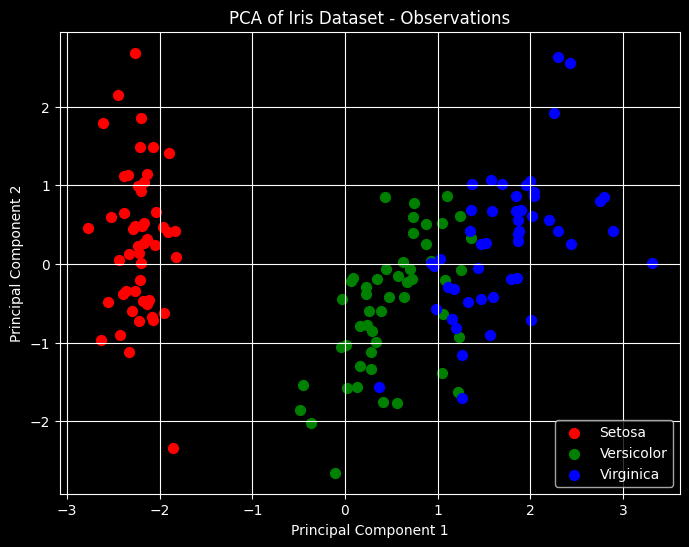

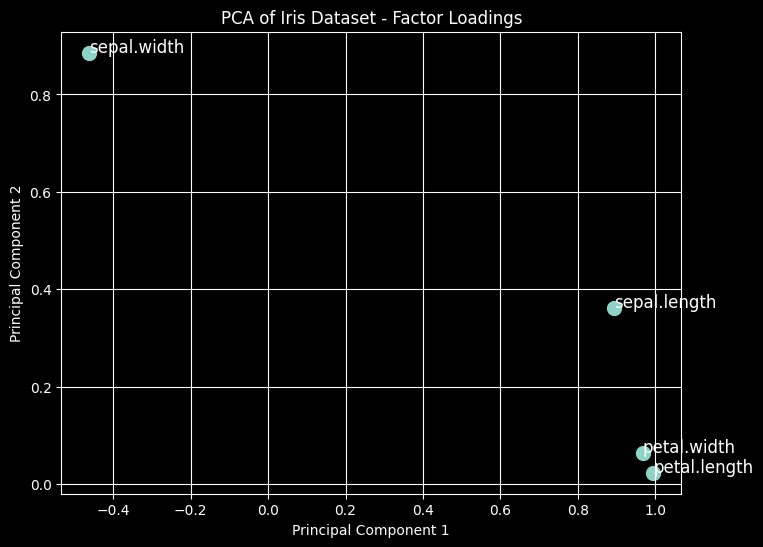

Conclusions:
1. The first principal component (PC1) separates Setosa from Versicolor and Virginica.
2. The second principal component (PC2) provides some separation between Versicolor and Virginica.
3. Sepal length and petal length have high loadings on PC1, indicating they contribute significantly to the separation along this axis.
4. Sepal width and petal width have high loadings on PC2, indicating they contribute significantly to the separation along this axis.

Verification:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
dataframe = pd.read_csv('data/iris.csv')

# Standardize the features
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = dataframe.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Add target to the DataFrame
finalDf = pd.concat([principalDf, dataframe[['variety']]], axis=1)

# Plot the observations
plt.figure(figsize=(8, 6))
targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['variety'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                finalDf.loc[indicesToKeep, 'PC2'], 
                c=color, 
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('PCA of Iris Dataset - Observations')
plt.grid()

# Plot the factor loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], s=100)
for i, feature in enumerate(features):
    plt.text(loadings[i, 0], loadings[i, 1], feature, fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset - Factor Loadings')
plt.grid()

plt.show()

# Conclusions
print("Conclusions:")
print("1. The first principal component (PC1) separates Setosa from Versicolor and Virginica.")
print("2. The second principal component (PC2) provides some separation between Versicolor and Virginica.")
print("3. Sepal length and petal length have high loadings on PC1, indicating they contribute significantly to the separation along this axis.")
print("4. Sepal width and petal width have high loadings on PC2, indicating they contribute significantly to the separation along this axis.")

# Verify conclusions by examining specific cases
print("\nVerification:")
print(dataframe.head())

### Explicación
- La primera gráfica muestra las observaciones en el espacio de los dos primeros componentes principales, coloreadas por especie.
- La segunda gráfica muestra las cargas factoriales, indicando cómo cada característica original contribuye a los componentes principales.
- Las conclusiones se extraen basándose en la separación de especies en la gráfica de observaciones y las contribuciones de las características en la gráfica de cargas factoriales.
- Se imprimen casos específicos del DataFrame para verificar las conclusiones.

### Conclusiones
1. El primer componente principal (PC1) separa Setosa de Versicolor y Virginica.
2. El segundo componente principal (PC2) proporciona cierta separación entre Versicolor y Virginica.
3. La longitud del sépalo y la longitud del pétalo tienen altas cargas en PC1, lo que indica que contribuyen significativamente a la separación a lo largo de este eje.
4. El ancho del sépalo y el ancho del pétalo tienen altas cargas en PC2, lo que indica que contribuyen significativamente a la separación a lo largo de este eje.

### Verificación
Se imprimen los primeros casos del DataFrame para corroborar las conclusiones.